In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sales_dict={'colour':['Yellow','Black','Blue','Red','Yellow','Black','Blue',
                      'Red','Yellow','Black','Blue','Red','Yellow','Black','Blue','Red','Blue','Red'],
           'sales':[100000,150000,80000,90000,200000,145000,120000,
                    300000,250000,200000,160000,90000,90100,150000,142000,130000,400000,350000],
          'transactions':[100,150,820,920,230,120,70,250,250,110,130,860,980,300,150,170,230,280],
           'product':['type A','type A','type A','type A','type A','type A','type A',
                      'type A','type A','type B','type B','type B','type B','type B','type B','type B','type B','type B']}

In [3]:
sales_dict

{'colour': ['Yellow',
  'Black',
  'Blue',
  'Red',
  'Yellow',
  'Black',
  'Blue',
  'Red',
  'Yellow',
  'Black',
  'Blue',
  'Red',
  'Yellow',
  'Black',
  'Blue',
  'Red',
  'Blue',
  'Red'],
 'sales': [100000,
  150000,
  80000,
  90000,
  200000,
  145000,
  120000,
  300000,
  250000,
  200000,
  160000,
  90000,
  90100,
  150000,
  142000,
  130000,
  400000,
  350000],
 'transactions': [100,
  150,
  820,
  920,
  230,
  120,
  70,
  250,
  250,
  110,
  130,
  860,
  980,
  300,
  150,
  170,
  230,
  280],
 'product': ['type A',
  'type A',
  'type A',
  'type A',
  'type A',
  'type A',
  'type A',
  'type A',
  'type A',
  'type B',
  'type B',
  'type B',
  'type B',
  'type B',
  'type B',
  'type B',
  'type B',
  'type B']}

In [4]:
data_sales=pd.DataFrame(sales_dict)

In [5]:
data_sales

,colour,sales,transactions,product
0,Yellow,100000,100,type A
1,Black,150000,150,type A
2,Blue,80000,820,type A
3,Red,90000,920,type A
4,Yellow,200000,230,type A
5,Black,145000,120,type A
6,Blue,120000,70,type A
7,Red,300000,250,type A
8,Yellow,250000,250,type A
9,Black,200000,110,type B


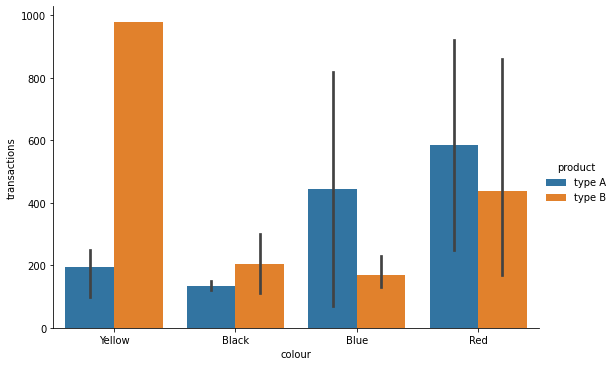

In [6]:
sns.catplot(x="colour", y="transactions", kind="bar", hue="product", aspect=1.5, data=data_sales)

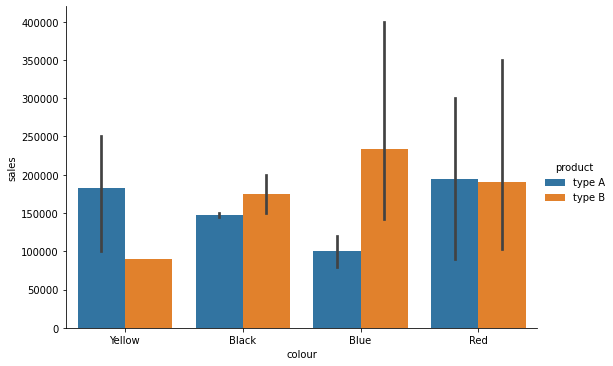

In [7]:
sns.catplot(x="colour", y="sales", kind="bar", hue="product", aspect=1.5, data=data_sales)

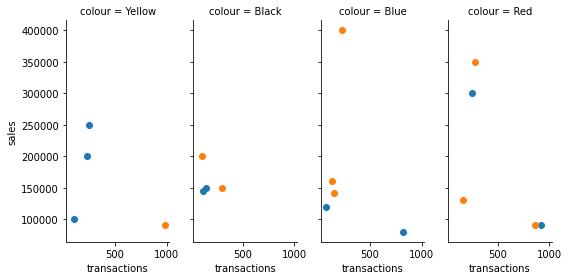

In [8]:
graph = sns.FacetGrid(data_sales, col="colour", height=4, hue="product",aspect=.5)
graph.map(plt.scatter, "transactions", "sales");

In [9]:
# Split: Groupby the column 'colour'

data_gby = data_sales.groupby('colour')
print(type(data_gby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [10]:
#  lets check the names of the groups

data_gby.groups

{'Black': [1, 5, 9, 13], 'Blue': [2, 6, 10, 14, 16], 'Red': [3, 7, 11, 15, 17], 'Yellow': [0, 4, 8, 12]}

In [11]:
### 'key' is the name of the group and 'value' is the segmented rows from the original DataFrame.

for key, value in data_gby: 
    print('GroupName: ',key)
    print(value)
    print('-------------------------------------------')

GroupName:  Black
   colour   sales  transactions product
1   Black  150000           150  type A
5   Black  145000           120  type A
9   Black  200000           110  type B
13  Black  150000           300  type B
-------------------------------------------
GroupName:  Blue
   colour   sales  transactions product
2    Blue   80000           820  type A
6    Blue  120000            70  type A
10   Blue  160000           130  type B
14   Blue  142000           150  type B
16   Blue  400000           230  type B
-------------------------------------------
GroupName:  Red
   colour   sales  transactions product
3     Red   90000           920  type A
7     Red  300000           250  type A
11    Red   90000           860  type B
15    Red  130000           170  type B
17    Red  350000           280  type B
-------------------------------------------
GroupName:  Yellow
    colour   sales  transactions product
0   Yellow  100000           100  type A
4   Yellow  200000           230  ty

In [12]:
data_colour=data_sales.groupby('colour').sum()

In [13]:

print(data_colour)

         sales  transactions
colour                      
Black   645000           680
Blue    902000          1400
Red     960000          2480
Yellow  640100          1560


In [14]:
def create_dual(data_1,data_2,data_x):
    fig, ax1 = plt.subplots(figsize=(8, 8))

    color = 'tab:red'
    ax1.set_ylabel('sales', color=color)
    ax1.bar(data_x, data_1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', labelrotation=90.0)

    ax2 = ax1.twinx()                            # instantiate a second axes that shares the same x-axis
    
    
    color = 'tab:cyan'
    ax2.set_ylabel('transactions', color=color)  # we already handled the x-label with ax1
    ax2.plot(data_x, data_2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    #fig.tight_layout()                          # otherwise the right y-label is slightly clipped
    plt.show()

In [15]:
y_1 = data_colour['transactions']
y_2 = data_colour['sales']
data_x= data_colour.index

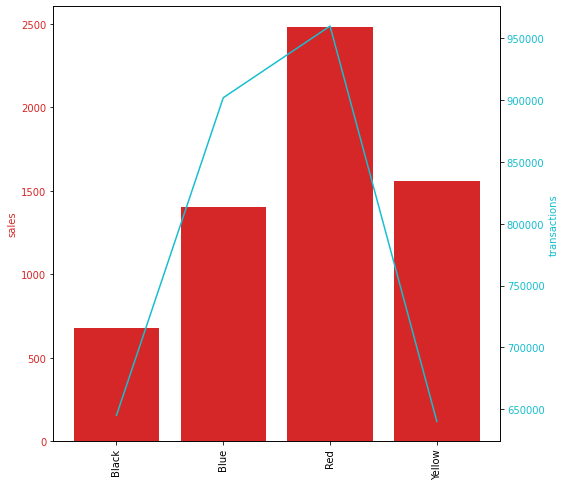

In [16]:
create_dual(y_1,y_2,data_x)    ## Function call

In [17]:
data_prod_colour_index=data_sales.groupby(['product','colour'], as_index=True).sum()         # Note: as_index=True

In [18]:
data_prod_colour_index

sales  transactions
product colour                      
type A  Black   295000           270
        Blue    200000           890
        Red     390000          1170
        Yellow  550000           580
type B  Black   350000           410
        Blue    702000           510
        Red     570000          1310
        Yellow   90100           980

In [19]:
data_prod_colour_Noindex = data_sales.groupby(['product','colour'],as_index=False).sum()

data_prod_colour_Noindex

,product,colour,sales,transactions
0,type A,Black,295000,270
1,type A,Blue,200000,890
2,type A,Red,390000,1170
3,type A,Yellow,550000,580
4,type B,Black,350000,410
5,type B,Blue,702000,510
6,type B,Red,570000,1310
7,type B,Yellow,90100,980


In [20]:
data_sales['product*colour']=data_sales['product']+'-'+data_sales['colour']

In [21]:
data_concat= data_sales.groupby('product*colour',as_index=True).sum()

In [22]:
data_concat

,sales,transactions
product*colour,,
type A-Black,295000,270
type A-Blue,200000,890
type A-Red,390000,1170
type A-Yellow,550000,580
type B-Black,350000,410
type B-Blue,702000,510
type B-Red,570000,1310
type B-Yellow,90100,980


In [23]:
list(data_concat.index)

['type A-Black',
 'type A-Blue',
 'type A-Red',
 'type A-Yellow',
 'type B-Black',
 'type B-Blue',
 'type B-Red',
 'type B-Yellow']

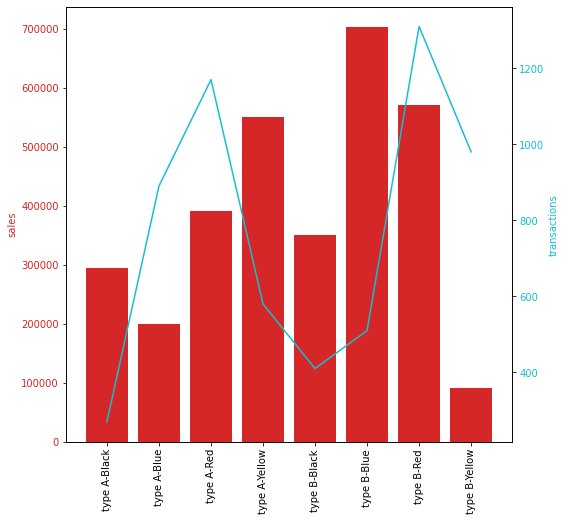

In [24]:
create_dual(data_concat['sales'],data_concat['transactions'],data_concat.index)